# Importing ApacheSpark

In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, SparkSession
from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType, StringType
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .getOrCreate()

# Importing Data Loading Package

In [2]:
import pandas as pd

# Importing Data Visualization Packages

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing PySpark Packages

In [4]:
from pyspark.ml.feature import StringIndexer,VectorIndexer
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler 
from pyspark.ml.feature import Normalizer

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import GBTClassifier

from pyspark.ml import Pipeline

from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

In [ ]:
!wget https://github.com/ashiqurrahmankhan21st/CapstoneProject/blob/master/cars_data.csv?raw=true
!mv cars_data.csv?raw=true cars_data.csv

In [5]:
#DataSet source https://www.kaggle.com/goyalshalini93/car-data
df = pd.read_csv('cars_data.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
#Calculating cars volume and assigning in carSize column
df['carSize'] = df['carlength']*df['carwidth']*df['carheight'] #volume

In [8]:
#deleting cars length. width and height columns
del df['carlength'],df['carwidth'],df['carheight']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [10]:
#Checking for duplicates
df.loc[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carSize


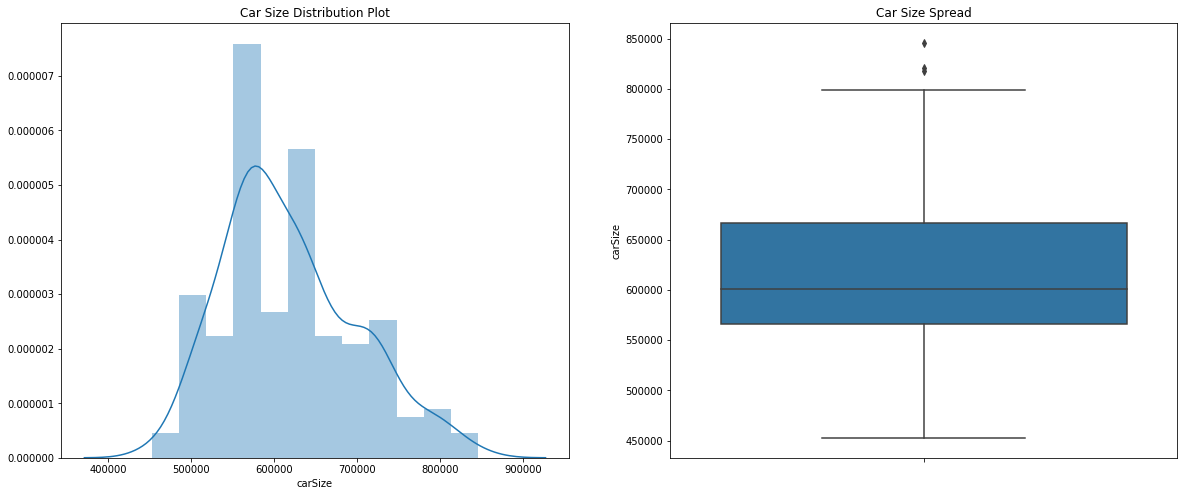

In [11]:
#visualizing carSize column

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Size Distribution Plot')
sns.distplot(df.carSize)

plt.subplot(1,2,2)
plt.title('Car Size Spread')
sns.boxplot(y=df.carSize)

plt.show()

In [12]:
#Description of carSize column
print((df.carSize).describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count       205.000000
mean     618719.288873
std       79463.195262
min      452643.156000
25%      566490.600000
50%      601385.700000
75%      666250.200000
85%      716819.664000
90%      724074.876000
100%     846007.659000
max      846007.659000
Name: carSize, dtype: float64


# Visualization of Categorical Data With Respect to Car Size

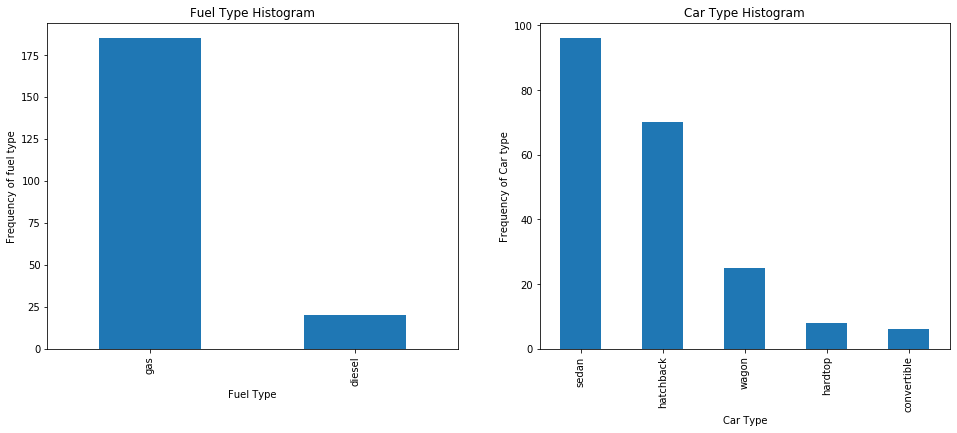

In [13]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,2)
plt1 = df.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

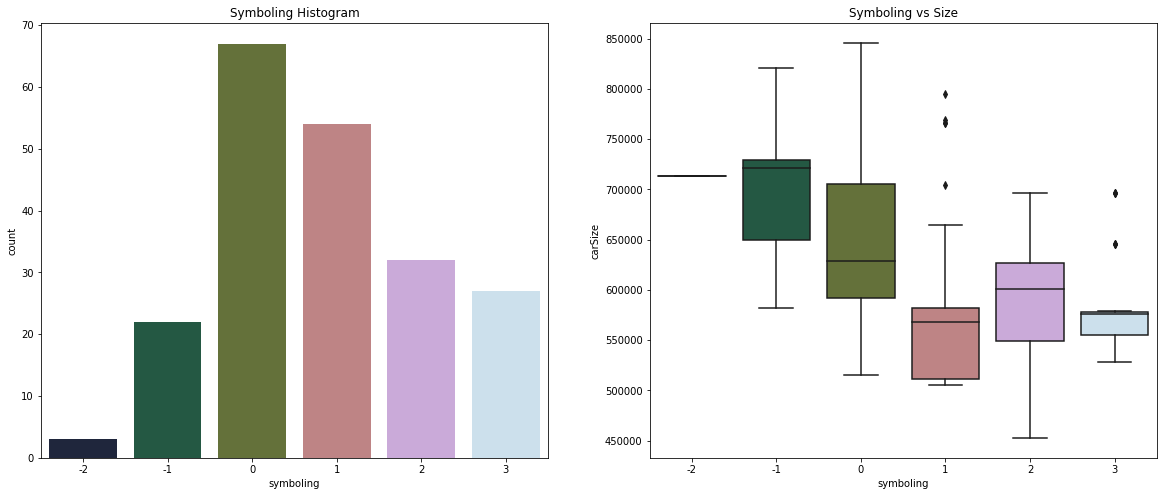

In [14]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Size')
sns.boxplot(x=df.symboling, y=df.carSize, palette=("cubehelix"))

plt.show()

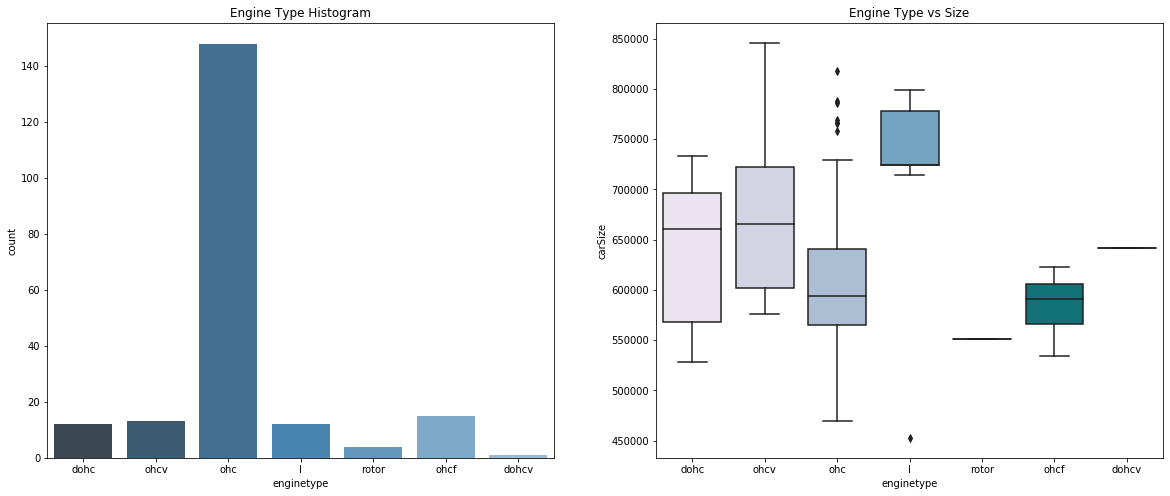

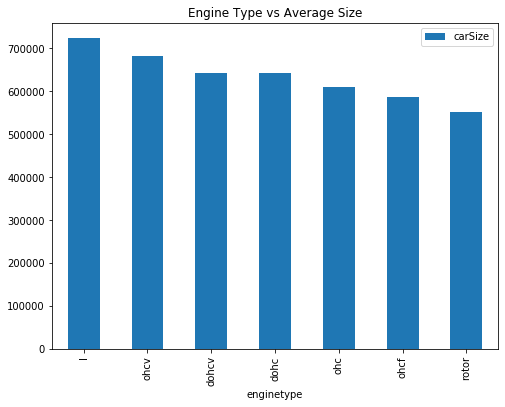

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(df.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Size')
sns.boxplot(x=df.enginetype, y=df.carSize, palette=("PuBuGn"))

plt.show()

df1 = pd.DataFrame(df.groupby(['enginetype'])['carSize'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Size')
plt.show()

<Figure size 1800x432 with 0 Axes>

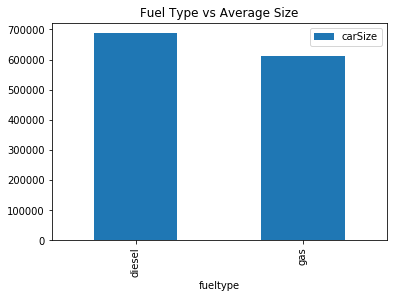

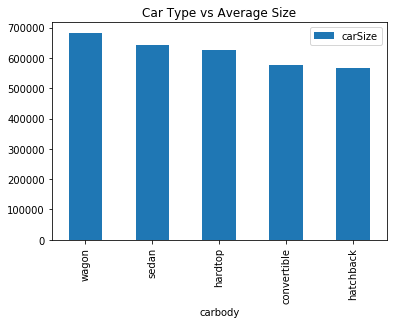

In [16]:
plt.figure(figsize=(25, 6))

df2 = pd.DataFrame(df.groupby(['fueltype'])['carSize'].mean().sort_values(ascending = False))
df2.plot.bar()
plt.title('Fuel Type vs Average Size')
plt.show()

df3 = pd.DataFrame(df.groupby(['carbody'])['carSize'].mean().sort_values(ascending = False))
df3.plot.bar()
plt.title('Car Type vs Average Size')
plt.show()

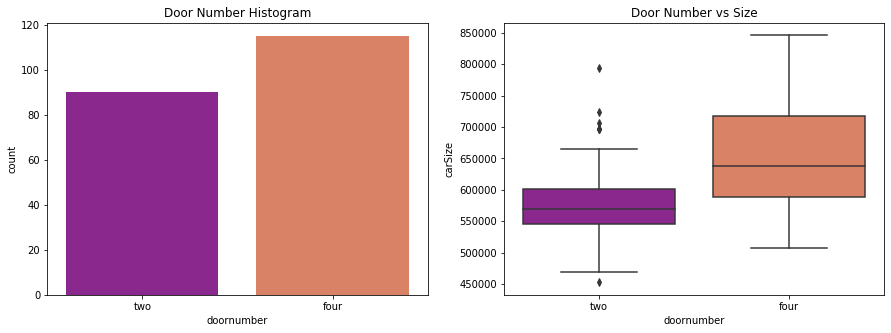

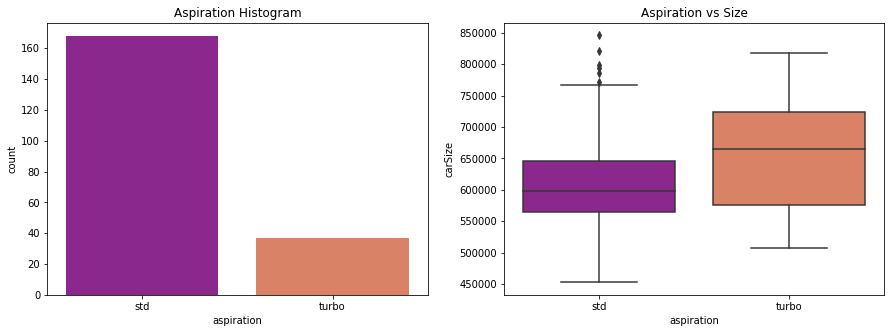

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(df.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Size')
sns.boxplot(x=df.doornumber, y=df.carSize, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(df.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Size')
sns.boxplot(x=df.aspiration, y=df.carSize, palette=("plasma"))

plt.show()

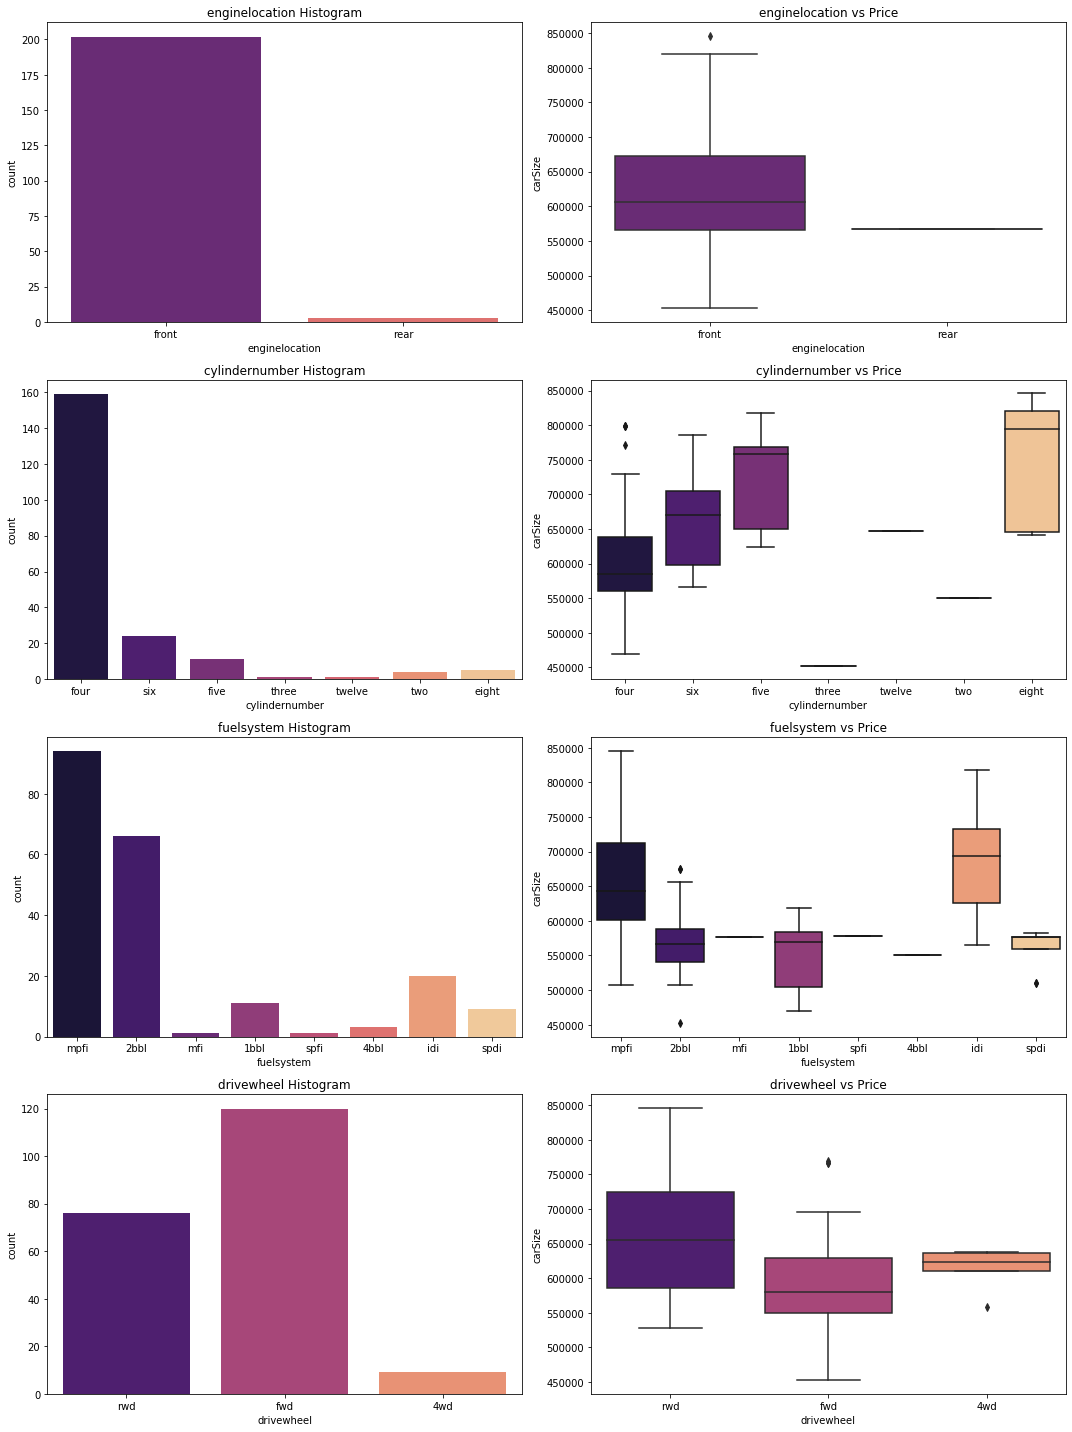

In [18]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=df[x], y=df.carSize, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

/home/shatiil/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


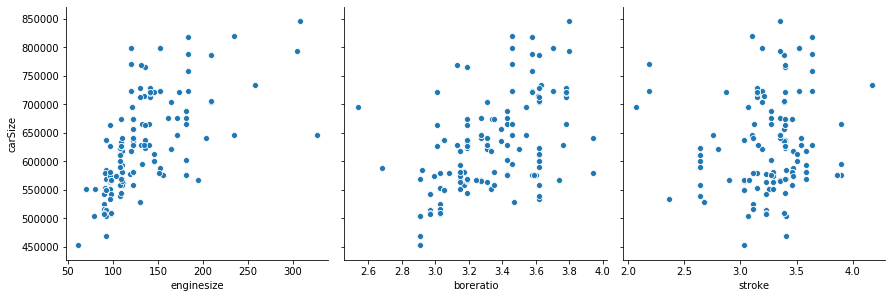

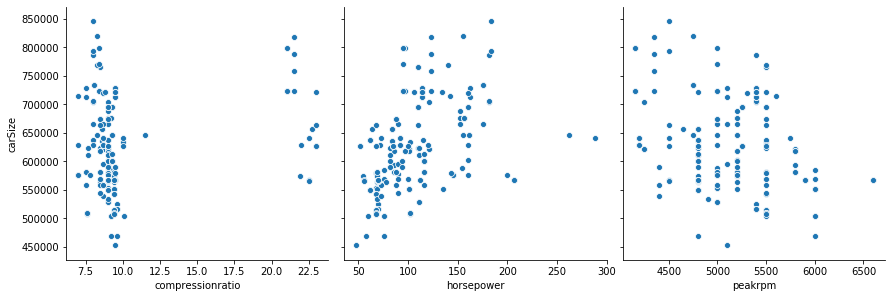

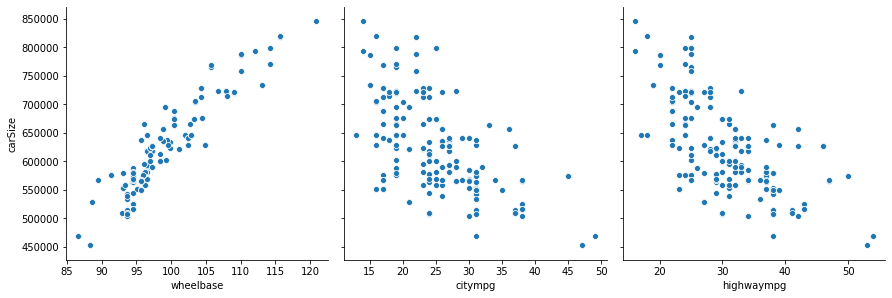

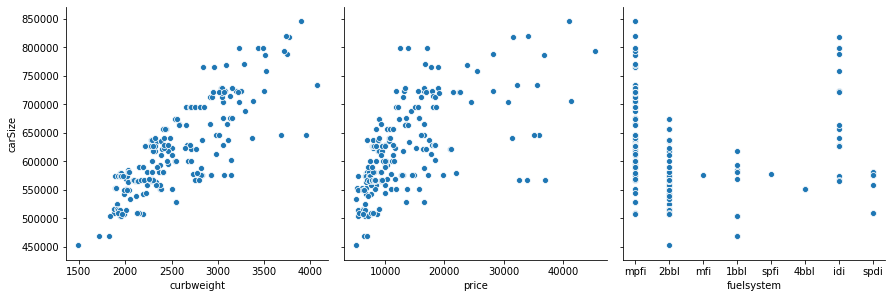

In [19]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='carSize',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')
pp('curbweight', 'price','fuelsystem')

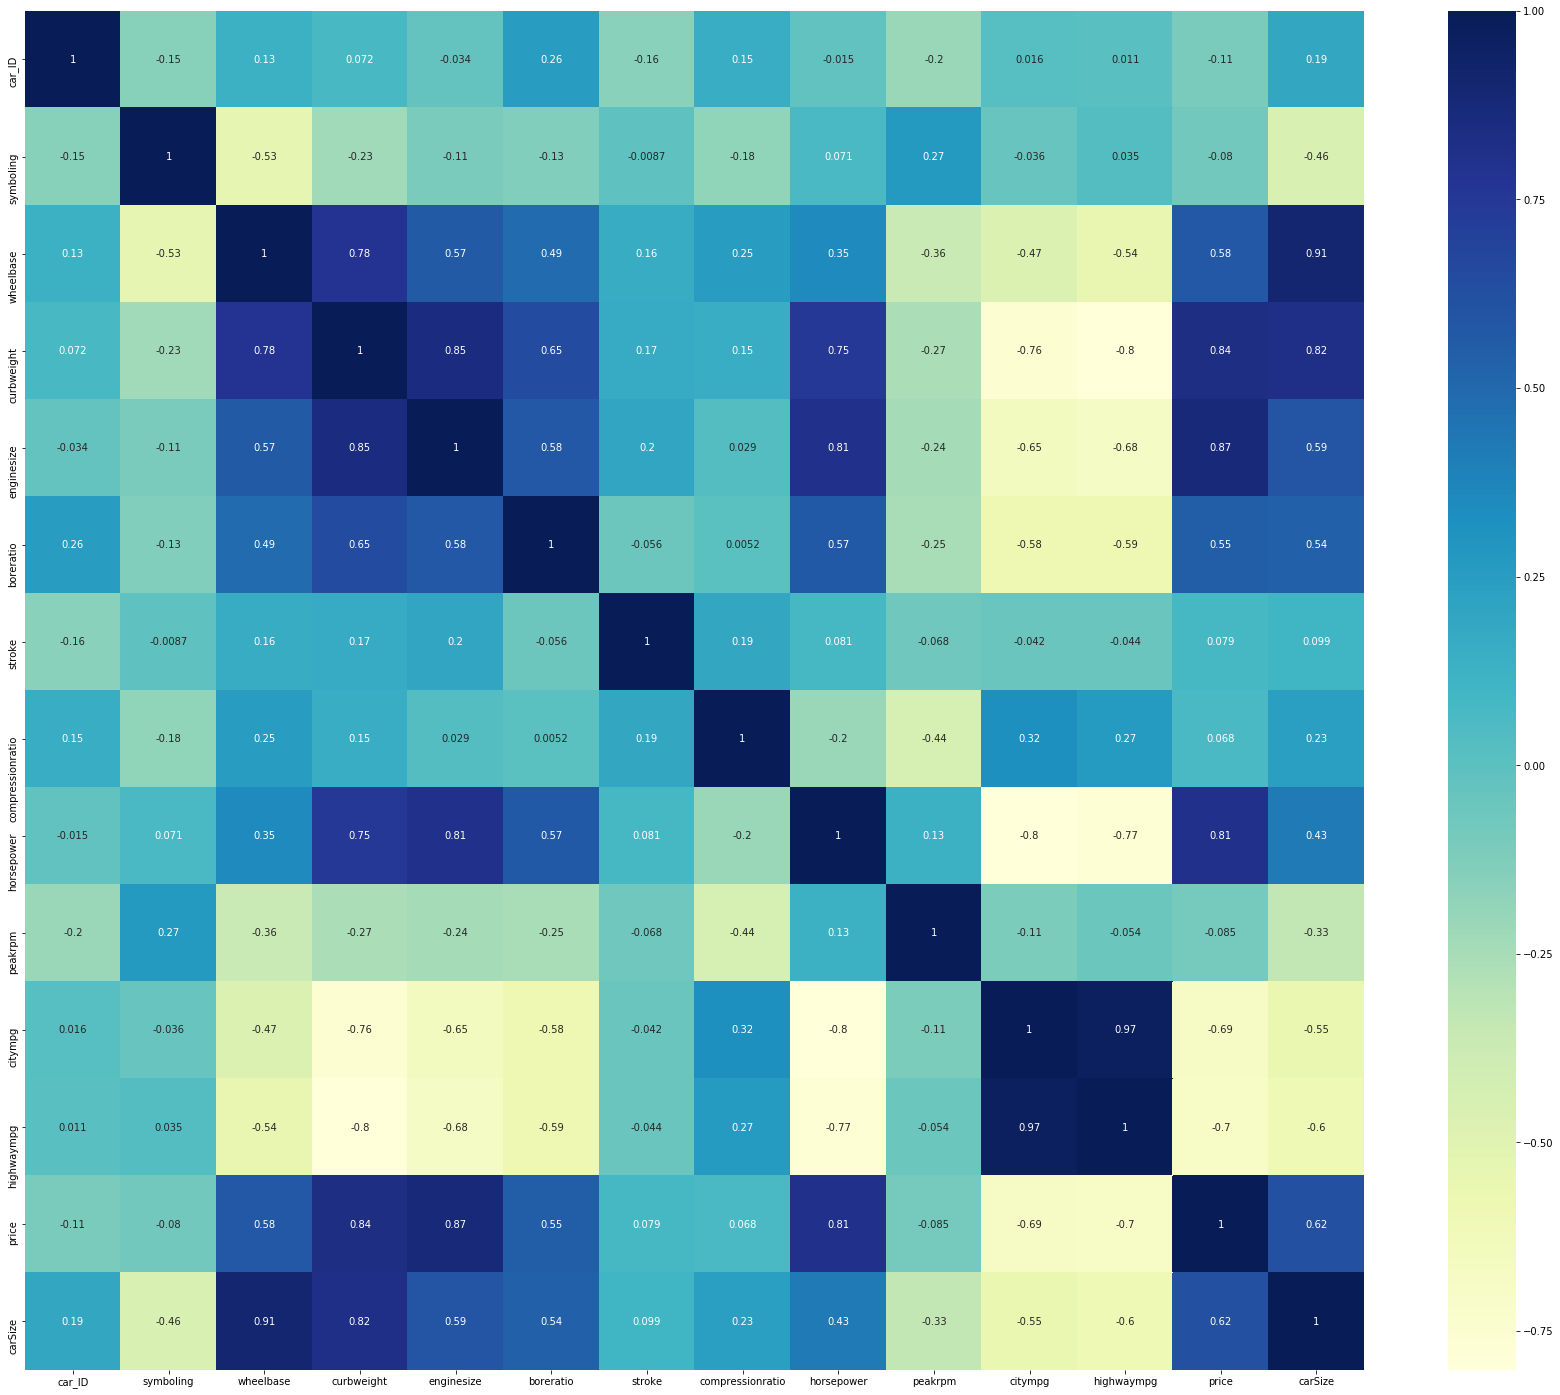

In [20]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Classifing the Data in 3 Classes Based on Car Volume/Size (ABC Analysis)

In [21]:
def ABC_segmentation(perc):
    '''
    Creates the 3 classes A, B and C based 
    on quantity percentages (A-60%, B-25% , C-15%)
    '''
    if perc > 0 and perc < 0.6:
        return 'A'
    elif perc >= 0.6 and perc < 0.85:
        return 'B'
    elif perc >= 0.85:
        return 'C'

df = df.sort_values(by=['carSize'], ascending=False)
RunCumCost = df['carSize'].cumsum()
TotSum = df['carSize'].sum()
RunPerc =  RunCumCost/TotSum
df['Class'] = RunPerc.apply(ABC_segmentation)

In [22]:
df.Class.value_counts()

A    112
B     56
C     37
Name: Class, dtype: int64

In [23]:
r = pd.DataFrame(columns =\
                     ['RandomForestMultiClassifier' , 'DecisionTreeClassifier', 'LogisticRegression' , 
                      'LinearSVC','GBTClassifier','RandomForestBinaryClassifier'],\
                     index=['TrainAccuracy', 'TestAccuracy', 'Accuracy' , 'Precision' , 'Recall'])

# Based on Above Visualization and Analysis taking these Columns for farther analysis

In [24]:
temp = df[['wheelbase','curbweight','enginesize','boreratio','price','carSize','Class']]

# RandomForestClassifier

In [25]:
dfrf = spark.createDataFrame(temp)
dfrf.createOrReplaceTempView("dfrf")
split = dfrf.randomSplit([0.8,0.2])
tr = split[0]
te = split[1]
dfrf.show()

+---------+----------+----------+---------+-------+-----------------+-----+
|wheelbase|curbweight|enginesize|boreratio|  price|          carSize|Class|
+---------+----------+----------+---------+-------+-----------------+-----+
|    120.9|      3900|       308|      3.8|40960.0|846007.6590000001|    A|
|    115.6|      3740|       234|     3.46|34184.0|        820742.73|    A|
|    115.6|      3770|       183|     3.58|31600.0|       817837.446|    A|
|    114.2|      3485|       152|      3.7|17075.0|798599.4120000001|    A|
|    114.2|      3430|       152|      3.7|13860.0|798599.4120000001|    A|
|    114.2|      3230|       120|     3.46|12440.0|798599.4120000001|    A|
|    112.0|      3715|       304|      3.8|45400.0|        794568.96|    A|
|    110.0|      3750|       183|     3.58|28248.0|       787769.849|    A|
|    110.0|      3505|       209|     3.62|36880.0|        786358.99|    A|
|    114.2|      3285|       120|     3.46|16695.0|771389.8920000001|    A|
|    105.8| 

In [26]:
indexer = StringIndexer(inputCol="Class", outputCol="label")

vectorAssembler =\
    VectorAssembler(inputCols=['wheelbase','curbweight','enginesize','boreratio','price'],outputCol="features")

featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4)

rf = RandomForestClassifier(labelCol="label", featuresCol="indexedFeatures")

pipeline = Pipeline(stages=[indexer, vectorAssembler, featureIndexer, rf])

In [27]:
model = pipeline.fit(te)
prediction = model.transform(te)
eval = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
r.iloc[0,0] = eval.evaluate(prediction)

In [28]:
model = pipeline.fit(te)
prediction = model.transform(te)
eval = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
r.iloc[1,0] = eval.evaluate(prediction)

In [29]:
model = pipeline.fit(tr)
predictions = model.transform(te)
results = predictions.select(['prediction', 'label'])
predictionAndLabels=results.rdd
metrics = MulticlassMetrics(predictionAndLabels)
cm=metrics.confusionMatrix().toArray()
r.iloc[2,0]=(cm[0][0]+cm[1][1])/cm.sum()
r.iloc[3,0]=(cm[0][0])/(cm[0][0]+cm[1][0])
r.iloc[4,0]=(cm[0][0])/(cm[0][0]+cm[0][1])

# DecisionTreeClassifier

In [30]:
dfdt = spark.createDataFrame(temp)
dfdt.createOrReplaceTempView("dfdt")
split = dfdt.randomSplit([0.8,0.2])
tr = split[0]
te = split[1]
dfdt.show()

+---------+----------+----------+---------+-------+-----------------+-----+
|wheelbase|curbweight|enginesize|boreratio|  price|          carSize|Class|
+---------+----------+----------+---------+-------+-----------------+-----+
|    120.9|      3900|       308|      3.8|40960.0|846007.6590000001|    A|
|    115.6|      3740|       234|     3.46|34184.0|        820742.73|    A|
|    115.6|      3770|       183|     3.58|31600.0|       817837.446|    A|
|    114.2|      3485|       152|      3.7|17075.0|798599.4120000001|    A|
|    114.2|      3430|       152|      3.7|13860.0|798599.4120000001|    A|
|    114.2|      3230|       120|     3.46|12440.0|798599.4120000001|    A|
|    112.0|      3715|       304|      3.8|45400.0|        794568.96|    A|
|    110.0|      3750|       183|     3.58|28248.0|       787769.849|    A|
|    110.0|      3505|       209|     3.62|36880.0|        786358.99|    A|
|    114.2|      3285|       120|     3.46|16695.0|771389.8920000001|    A|
|    105.8| 

In [31]:
indexer = StringIndexer(inputCol="Class", outputCol="label")

vectorAssembler =\
    VectorAssembler(inputCols=['wheelbase','curbweight','enginesize','boreratio','price'],outputCol="features")

featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4)

dt = DecisionTreeClassifier(labelCol="label", featuresCol="indexedFeatures")

pipeline = Pipeline(stages=[indexer, vectorAssembler, featureIndexer, dt])

In [32]:
model = pipeline.fit(tr)
prediction = model.transform(tr)
eval = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
r.iloc[0,1] = eval.evaluate(prediction)

In [33]:
model = pipeline.fit(te)
prediction = model.transform(te)
eval = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
r.iloc[1,1] = eval.evaluate(prediction)

In [34]:
model = pipeline.fit(tr)
predictions = model.transform(te)
results = predictions.select(['prediction', 'label'])
predictionAndLabels=results.rdd
metrics = MulticlassMetrics(predictionAndLabels)
cm=metrics.confusionMatrix().toArray()
r.iloc[2,1]=(cm[0][0]+cm[1][1])/cm.sum()
r.iloc[3,1]=(cm[0][0])/(cm[0][0]+cm[1][0])
r.iloc[4,1]=(cm[0][0])/(cm[0][0]+cm[0][1])

# LogisticRegression

In [35]:
dflr = spark.createDataFrame(temp)
dflr.createOrReplaceTempView("df")

split = dflr.randomSplit([0.8,0.2])
train = split[0]
test = split[1]
dflr.show()

+---------+----------+----------+---------+-------+-----------------+-----+
|wheelbase|curbweight|enginesize|boreratio|  price|          carSize|Class|
+---------+----------+----------+---------+-------+-----------------+-----+
|    120.9|      3900|       308|      3.8|40960.0|846007.6590000001|    A|
|    115.6|      3740|       234|     3.46|34184.0|        820742.73|    A|
|    115.6|      3770|       183|     3.58|31600.0|       817837.446|    A|
|    114.2|      3485|       152|      3.7|17075.0|798599.4120000001|    A|
|    114.2|      3430|       152|      3.7|13860.0|798599.4120000001|    A|
|    114.2|      3230|       120|     3.46|12440.0|798599.4120000001|    A|
|    112.0|      3715|       304|      3.8|45400.0|        794568.96|    A|
|    110.0|      3750|       183|     3.58|28248.0|       787769.849|    A|
|    110.0|      3505|       209|     3.62|36880.0|        786358.99|    A|
|    114.2|      3285|       120|     3.46|16695.0|771389.8920000001|    A|
|    105.8| 

In [36]:
indexer = StringIndexer(inputCol="Class",outputCol="label")
vectorAssembler = VectorAssembler(inputCols=['wheelbase','curbweight','enginesize','boreratio','price'],outputCol="features")
lr = LogisticRegression(maxIter=10,regParam=0.3,elasticNetParam=0.8)
pipeline = Pipeline(stages=[indexer,vectorAssembler,lr])

In [37]:
model = pipeline.fit(train)
prediction = model.transform(train)
eval = MulticlassClassificationEvaluator().setMetricName('accuracy').setLabelCol('label').setPredictionCol('prediction')
r.iloc[0,2] = eval.evaluate(prediction)

In [38]:
model = pipeline.fit(test)
prediction = model.transform(test)
eval = MulticlassClassificationEvaluator().setMetricName('accuracy').setLabelCol('label').setPredictionCol('prediction')
r.iloc[1,2] = eval.evaluate(prediction)

In [39]:
model = pipeline.fit(train)
prediction = model.transform(test)

results = prediction.select(['prediction', 'label'])
predictionAndLabels=results.rdd
metrics = MulticlassMetrics(predictionAndLabels)
cm=metrics.confusionMatrix().toArray()
r.iloc[2,2]=(cm[0][0]+cm[1][1])/cm.sum()
r.iloc[3,2]=(cm[0][0])/(cm[0][0]+cm[1][0])
r.iloc[4,2]=(cm[0][0])/(cm[0][0]+cm[0][1])

# Linear Support Vector Classifier (LinearSVC)

In [40]:
temp = df[['wheelbase','curbweight','enginesize','boreratio','price','carSize','Class']]

In [41]:
dfbi = pd.DataFrame(temp)
del dfbi['Class']

In [42]:
dfbi.head()

,wheelbase,curbweight,enginesize,boreratio,price,carSize
73,120.9,3900,308,3.80,40960.0,846007.659
71,115.6,3740,234,3.46,34184.0,820742.730
70,115.6,3770,183,3.58,31600.0,817837.446
114,114.2,3485,152,3.70,17075.0,798599.412
110,114.2,3430,152,3.70,13860.0,798599.412


# Classifing Data in Two Classes Based on Car Size/Volume

In [43]:
def ABC_segmentation(perc):
    '''
    Creates the two classes A, B based 
    on car Size percentages (A-20%, B-20%, C-20%, D-20%, E-20%,)
    '''
    if perc > 0 and perc < 0.6:
        return 'A'
    elif perc >= 0.6 :#and perc < 0.85:
        return 'B'

dfbi = dfbi.sort_values(by=['carSize'], ascending=False)
RunCumCost = dfbi['carSize'].cumsum()
TotSum = dfbi['carSize'].sum()
RunPerc =  RunCumCost/TotSum
dfbi['Class'] = RunPerc.apply(ABC_segmentation)

In [44]:
dfbi.head()

,wheelbase,curbweight,enginesize,boreratio,price,carSize,Class
73,120.9,3900,308,3.80,40960.0,846007.659,A
71,115.6,3740,234,3.46,34184.0,820742.730,A
70,115.6,3770,183,3.58,31600.0,817837.446,A
114,114.2,3485,152,3.70,17075.0,798599.412,A
110,114.2,3430,152,3.70,13860.0,798599.412,A


In [45]:
dfbi.Class.value_counts()

A    112
B     93
Name: Class, dtype: int64

In [46]:
dfLSVC = spark.createDataFrame(dfbi)
dfLSVC.createOrReplaceTempView("dfLSVC")

split = dfLSVC.randomSplit([0.8,0.2])
tr = split[0]
te = split[1]
dfLSVC.show()

+---------+----------+----------+---------+-------+-----------------+-----+
|wheelbase|curbweight|enginesize|boreratio|  price|          carSize|Class|
+---------+----------+----------+---------+-------+-----------------+-----+
|    120.9|      3900|       308|      3.8|40960.0|846007.6590000001|    A|
|    115.6|      3740|       234|     3.46|34184.0|        820742.73|    A|
|    115.6|      3770|       183|     3.58|31600.0|       817837.446|    A|
|    114.2|      3485|       152|      3.7|17075.0|798599.4120000001|    A|
|    114.2|      3430|       152|      3.7|13860.0|798599.4120000001|    A|
|    114.2|      3230|       120|     3.46|12440.0|798599.4120000001|    A|
|    112.0|      3715|       304|      3.8|45400.0|        794568.96|    A|
|    110.0|      3750|       183|     3.58|28248.0|       787769.849|    A|
|    110.0|      3505|       209|     3.62|36880.0|        786358.99|    A|
|    114.2|      3285|       120|     3.46|16695.0|771389.8920000001|    A|
|    105.8| 

In [47]:
indexer = StringIndexer(inputCol="Class",outputCol="label")
vectorAssembler = VectorAssembler(inputCols=['wheelbase','curbweight','enginesize','boreratio','price'],outputCol="features")
lsvc = LinearSVC(maxIter=10, regParam=0.1)
pipeline = Pipeline(stages=[indexer,vectorAssembler,lsvc])

In [48]:
model = pipeline.fit(tr)
prediction = model.transform(tr)
eval = BinaryClassificationEvaluator().setLabelCol('label').setRawPredictionCol('rawPrediction')
r.iloc[0,3] = eval.evaluate(prediction)

In [49]:
model = pipeline.fit(te)
prediction = model.transform(te)
eval = BinaryClassificationEvaluator().setLabelCol('label').setRawPredictionCol('rawPrediction')
r.iloc[1,3] = eval.evaluate(prediction)

In [50]:
model = pipeline.fit(tr)
prediction = model.transform(te)
results = prediction.select(['prediction', 'label'])
predictionAndLabels=results.rdd
metrics = MulticlassMetrics(predictionAndLabels)
cm=metrics.confusionMatrix().toArray()
r.iloc[2,3]=(cm[0][0]+cm[1][1])/cm.sum()
r.iloc[3,3]=(cm[0][0])/(cm[0][0]+cm[1][0])
r.iloc[4,3]=(cm[0][0])/(cm[0][0]+cm[0][1])

# GBTClassifier

In [51]:
dfgb = spark.createDataFrame(dfbi)
dfgb.createOrReplaceTempView("dfgb")

split = dfgb.randomSplit([0.8,0.2])
tr = split[0]
te = split[1]
dfgb.show()

+---------+----------+----------+---------+-------+-----------------+-----+
|wheelbase|curbweight|enginesize|boreratio|  price|          carSize|Class|
+---------+----------+----------+---------+-------+-----------------+-----+
|    120.9|      3900|       308|      3.8|40960.0|846007.6590000001|    A|
|    115.6|      3740|       234|     3.46|34184.0|        820742.73|    A|
|    115.6|      3770|       183|     3.58|31600.0|       817837.446|    A|
|    114.2|      3485|       152|      3.7|17075.0|798599.4120000001|    A|
|    114.2|      3430|       152|      3.7|13860.0|798599.4120000001|    A|
|    114.2|      3230|       120|     3.46|12440.0|798599.4120000001|    A|
|    112.0|      3715|       304|      3.8|45400.0|        794568.96|    A|
|    110.0|      3750|       183|     3.58|28248.0|       787769.849|    A|
|    110.0|      3505|       209|     3.62|36880.0|        786358.99|    A|
|    114.2|      3285|       120|     3.46|16695.0|771389.8920000001|    A|
|    105.8| 

In [52]:
indexer = StringIndexer(inputCol="Class",outputCol="label")
vectorAssembler =\
    VectorAssembler(inputCols=['wheelbase','curbweight','enginesize','boreratio','price'],outputCol="features")

featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4)

gbt = GBTClassifier(labelCol="label", featuresCol="indexedFeatures", maxIter=10)
pipeline = Pipeline(stages=[indexer,vectorAssembler, featureIndexer, gbt])

In [53]:
model = pipeline.fit(tr)
prediction = model.transform(tr)
eval = BinaryClassificationEvaluator().setLabelCol('label').setRawPredictionCol('rawPrediction')
r.iloc[0,4] = eval.evaluate(prediction)

In [54]:
model = pipeline.fit(te)
prediction = model.transform(te)
eval = BinaryClassificationEvaluator().setLabelCol('label').setRawPredictionCol('rawPrediction')
r.iloc[1,4] = eval.evaluate(prediction)

In [55]:
model = pipeline.fit(tr)
prediction = model.transform(te)
results = prediction.select(['prediction', 'label'])
predictionAndLabels=results.rdd
metrics = MulticlassMetrics(predictionAndLabels)
cm=metrics.confusionMatrix().toArray()
r.iloc[2,4]=(cm[0][0]+cm[1][1])/cm.sum()
r.iloc[3,4]=(cm[0][0])/(cm[0][0]+cm[1][0])
r.iloc[4,4]=(cm[0][0])/(cm[0][0]+cm[0][1])

# RandomForestClassifier Binary Classification

In [57]:
dfrfb = spark.createDataFrame(dfbi)
dfrfb.createOrReplaceTempView("dfrfb")

split = dfrfb.randomSplit([0.8,0.2])
tr = split[0]
te = split[1]
dfrfb.show()

+---------+----------+----------+---------+-------+-----------------+-----+
|wheelbase|curbweight|enginesize|boreratio|  price|          carSize|Class|
+---------+----------+----------+---------+-------+-----------------+-----+
|    120.9|      3900|       308|      3.8|40960.0|846007.6590000001|    A|
|    115.6|      3740|       234|     3.46|34184.0|        820742.73|    A|
|    115.6|      3770|       183|     3.58|31600.0|       817837.446|    A|
|    114.2|      3485|       152|      3.7|17075.0|798599.4120000001|    A|
|    114.2|      3430|       152|      3.7|13860.0|798599.4120000001|    A|
|    114.2|      3230|       120|     3.46|12440.0|798599.4120000001|    A|
|    112.0|      3715|       304|      3.8|45400.0|        794568.96|    A|
|    110.0|      3750|       183|     3.58|28248.0|       787769.849|    A|
|    110.0|      3505|       209|     3.62|36880.0|        786358.99|    A|
|    114.2|      3285|       120|     3.46|16695.0|771389.8920000001|    A|
|    105.8| 

In [58]:
indexer = StringIndexer(inputCol="Class",outputCol="label")
vectorAssembler =\
    VectorAssembler(inputCols=['wheelbase','curbweight','enginesize','boreratio','price'],outputCol="features")

featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4)

#rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")
rf = RandomForestClassifier(labelCol="label", featuresCol="indexedFeatures")
pipeline = Pipeline(stages=[indexer,vectorAssembler, featureIndexer, rf])

In [59]:
model = pipeline.fit(tr)
prediction = model.transform(tr)
eval = BinaryClassificationEvaluator().setLabelCol('label').setRawPredictionCol('rawPrediction')
r.iloc[0,5] = eval.evaluate(prediction)

In [60]:
model = pipeline.fit(te)
prediction = model.transform(te)
eval = BinaryClassificationEvaluator().setLabelCol('label').setRawPredictionCol('rawPrediction')
r.iloc[1,5] = eval.evaluate(prediction)

In [61]:
model = pipeline.fit(tr)
prediction = model.transform(te)
results = prediction.select(['prediction', 'label'])
predictionAndLabels=results.rdd
metrics = MulticlassMetrics(predictionAndLabels)
cm=metrics.confusionMatrix().toArray()
r.iloc[2,5]=(cm[0][0]+cm[1][1])/cm.sum()
r.iloc[3,5]=(cm[0][0])/(cm[0][0]+cm[1][0])
r.iloc[4,5]=(cm[0][0])/(cm[0][0]+cm[0][1])

In [64]:
r.head()

,RandomForestMultiClassifier,DecisionTreeClassifier,LogisticRegression,LinearSVC,GBTClassifier,RandomForestBinaryClassifier
TrainAccuracy,1,0.951515,0.5375,0.892374,1,1
TestAccuracy,1,0.975,0.577778,0.909722,1,1
Accuracy,0.711111,0.7,0.577778,0.529412,1,0.960784
Precision,1,1,0.742857,0.529412,1,0.913043
Recall,1,0.863636,1,1,1,1
